In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, -1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, -1))

train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers[:-4]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(), 
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_split=0.2,
                    batch_size=128)

Epoch 1/20


I0000 00:00:1733771409.458511      68 service.cc:145] XLA service 0x7de7ec006e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733771409.458554      68 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733771409.458558      68 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 10/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2332 - loss: 2.2761

I0000 00:00:1733771415.213933      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.7441 - loss: 0.7313 - val_accuracy: 0.8612 - val_loss: 0.3806
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8853 - loss: 0.3285 - val_accuracy: 0.8819 - val_loss: 0.3175
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8967 - loss: 0.2886 - val_accuracy: 0.8996 - val_loss: 0.2896
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9068 - loss: 0.2551 - val_accuracy: 0.8890 - val_loss: 0.3015
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9126 - loss: 0.2468 - val_accuracy: 0.8938 - val_loss: 0.3542
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9142 - loss: 0.2348 - val_accuracy: 0.8953 - val_loss: 0.3049
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9217 - loss: 0.2176 - val_accuracy: 0.9000 - val_loss: 0.2880
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9243 - loss: 0.2105 - val_accuracy: 0.90

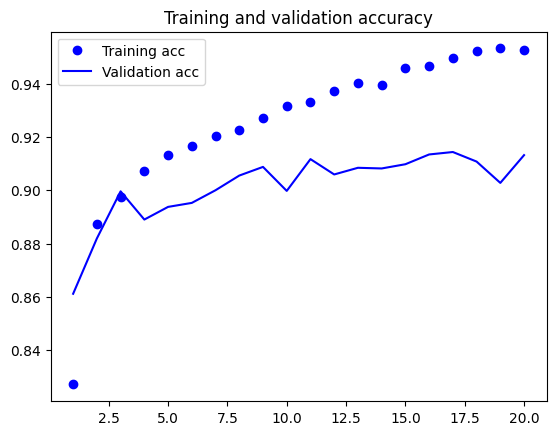

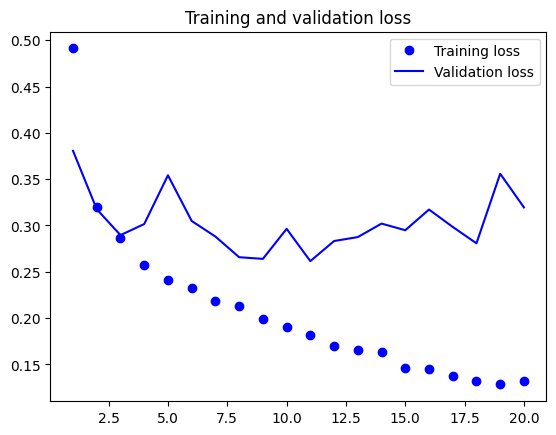

In [6]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9079 - loss: 0.3542
0.9078999757766724


In [8]:
model.save('VGG16_RNN.keras')

import json

with open('history_VGG16_RNN.json', 'w') as f:
    json.dump(history.history, f)
